# Exploring Dandiset 001375: Septum GABA disruption with DREADDs

**Note:** This notebook was AI-generated and has not been fully verified. Please be cautious when interpreting the code or results.

## Overview of Dandiset 001375

This Dandiset, titled "Septum GABA disruption with DREADDs", contains data from a pilot study investigating the effect of disrupting septal gabaergic activity using DREADDs on hippocampal and neocortical activity in mice.

**Dandiset URL:** https://dandiarchive.org/dandiset/001375/0.250406.1855

## Notebook Contents

This notebook will demonstrate how to:
- Access basic information about the Dandiset using the DANDI API.
- List the assets (files) contained within the Dandiset.
- Load a specific NWB file from the Dandiset.
- Explore the structure and contents of the NWB file.
- Load and visualize some sample data from the NWB file.

## Required Packages

This notebook requires the following Python packages:
- `dandi`
- `pynwb`
- `h5py`
- `remfile`
- `numpy`
- `matplotlib`
- `itertools`
- `seaborn`

In [1]:
# Import necessary packages
from itertools import islice
from dandi.dandiapi import DandiAPIClient
import pynwb
import h5py
import remfile
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set up seaborn theme for better looking plots
sns.set_theme()

## Loading the Dandiset and Listing Assets

We will connect to the DANDI archive and load the specified Dandiset. Then we will list the first few assets to get an idea of the files available.

In [2]:
# Connect to DANDI archive
client = DandiAPIClient()
dandiset = client.get_dandiset("001375", "0.250406.1855")

# Print basic information about the Dandiset
metadata = dandiset.get_raw_metadata()
print(f"Dandiset name: {metadata['name']}")
print(f"Dandiset URL: {metadata['url']}")

# List some assets in the Dandiset
assets = dandiset.get_assets()
print("\nFirst 5 assets:")
for asset in islice(assets, 5):
    print(f"- {asset.path} (ID: {asset.identifier})")

Dandiset name: Septum GABA disruption with DREADDs
Dandiset URL: https://dandiarchive.org/dandiset/001375/0.250406.1855

First 5 assets:
- sub-MS13B/sub-MS13B_ses-20240725T190000_ecephys.nwb (ID: ce525828-8534-4b56-9e47-d2a34d1aa897)
- sub-MS14A/sub-MS14A_ses-20240906T190000_obj-12781w8_ecephys.nwb (ID: 376dc673-611b-4521-b135-9ec01c7f4f74)
- sub-MS14A/sub-MS14A_ses-20240906T190000_obj-ardad2_ecephys.nwb (ID: fea95c0e-2f07-49a3-b607-4b7e9f278e16)


## Loading an NWB File

We will now load one of the NWB files from the Dandiset to examine its structure and contents. We will load the file located at `sub-MS13B/sub-MS13B_ses-20240725T190000_ecephys.nwb` using its direct download URL.

In [3]:
# Load the NWB file
url = "https://api.dandiarchive.org/api/assets/ce525828-8534-4b56-9e47-d2a34d1aa897/download/"
remote_file = remfile.File(url)
h5_file = h5py.File(remote_file)
io = pynwb.NWBHDF5IO(file=h5_file)
nwb = io.read()

# Display some basic metadata from the NWB file
print(f"NWB file session description: {nwb.session_description}")
print(f"NWB file identifier: {nwb.identifier}")
print(f"NWB file session start time: {nwb.session_start_time}")

/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.8.0 because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


NWB file session description: mouse running laps in virtual hallway
NWB file identifier: MS13B
NWB file session start time: 2024-07-25 19:00:00-07:00


## NWB File Contents Summary

The loaded NWB file `sub-MS13B/sub-MS13B_ses-20240725T190000_ecephys.nwb` contains various types of neurophysiology data and associated metadata. Key sections include:

*   **acquisition/time_series**: Raw extracellular electrophysiology recordings. This dataset has a shape of `(144675584, 256)`, indicating a large number of time samples across 256 channels. The data type is `int16` and the unit is `mV` with a sampling rate of `30000.0` Hz.
*   **electrode_groups**: Information about groups of electrodes, such as shanks. This file contains information for `shank1` and `shank2`, both described as 128-channel silicon probes with locations in the ventral hippocampus and visual cortex.
*   **devices**: Details about the recording devices used. This file describes a "silicon probe array" manufactured by UCLA with 128 channels.
*   **intervals/trials**: Time intervals marking the start and stop times of experimental trials (laps in a virtual hallway). This table has columns for `start_time` and `stop_time` and contains 387 entries.
*   **electrodes**: A dynamic table providing details for each electrode, including `x`, `y` coordinates, `location`, `filtering`, `group`, `group_name`, and `label`. This table contains information for all 256 electrodes.
*   **subject**: Metadata about the experimental subject, including age, sex, species, and description. The subject ID is `MS13B`, a `Mus musculus` male at P90D with a medial septum DREADD manipulation.
*   **units**: Information about identified single units (neurons), including spike times. This table contains 33 units, each with associated spike times.

You can explore this NWB file interactively on NeuroSift: [https://neurosift.app/nwb?url=https://api.dandiarchive.org/api/assets/ce525828-8534-4b56-9e47-d2a34d1aa897/download/&dandisetId=001375&dandisetVersion=draft](https://neurosift.app/nwb?url=https://api.dandiarchive.org/api/assets/ce525828-8534-4b56-9e47-d2a34d1aa897/download/&dandisetId=001375&dandisetVersion=draft)

## Exploring Electrode Data

We can access the `electrodes` table to see the configuration and details of the recording electrodes.

In [4]:
# Get the electrodes table as a pandas DataFrame
electrodes_df = nwb.electrodes.to_dataframe()

# Display the first few rows of the electrodes table
print("First 5 rows of the electrodes table:")
print(electrodes_df.head())

# Print the columns of the electrodes table
print("\nColumns in the electrodes table:")
print(electrodes_df.columns.tolist())

# Get electrode locations
electrode_locations = electrodes_df['location'].unique()
print("\nUnique electrode locations:")
print(electrode_locations)

First 5 rows of the electrodes table:
       x       y location        filtering  \
id                                           
0   20.0  1375.0  unknown  0.1 - 7500.0 Hz   
1   20.0  1325.0  unknown  0.1 - 7500.0 Hz   
2   20.0  1275.0  unknown  0.1 - 7500.0 Hz   
3   20.0  1225.0  unknown  0.1 - 7500.0 Hz   
4   20.0  1175.0  unknown  0.1 - 7500.0 Hz   

                                                group group_name  \
id                                                                 
0   shank1 pynwb.ecephys.ElectrodeGroup at 0x12501...     shank1   
1   shank1 pynwb.ecephys.ElectrodeGroup at 0x12501...     shank1   
2   shank1 pynwb.ecephys.ElectrodeGroup at 0x12501...     shank1   
3   shank1 pynwb.ecephys.ElectrodeGroup at 0x12501...     shank1   
4   shank1 pynwb.ecephys.ElectrodeGroup at 0x12501...     shank1   

                  label  
id                       
0   shank1-electrode001  
1   shank1-electrode002  
2   shank1-electrode003  
3   shank1-electrode004  
4   sh

## Visualizing Electrophysiology Data

We will load a small subset of the raw extracellular electrophysiology data from the `acquisition/time_series` to visualize it. Loading the entire dataset (`shape (144675584, 256)`) would be too much data to load into memory in a notebook.

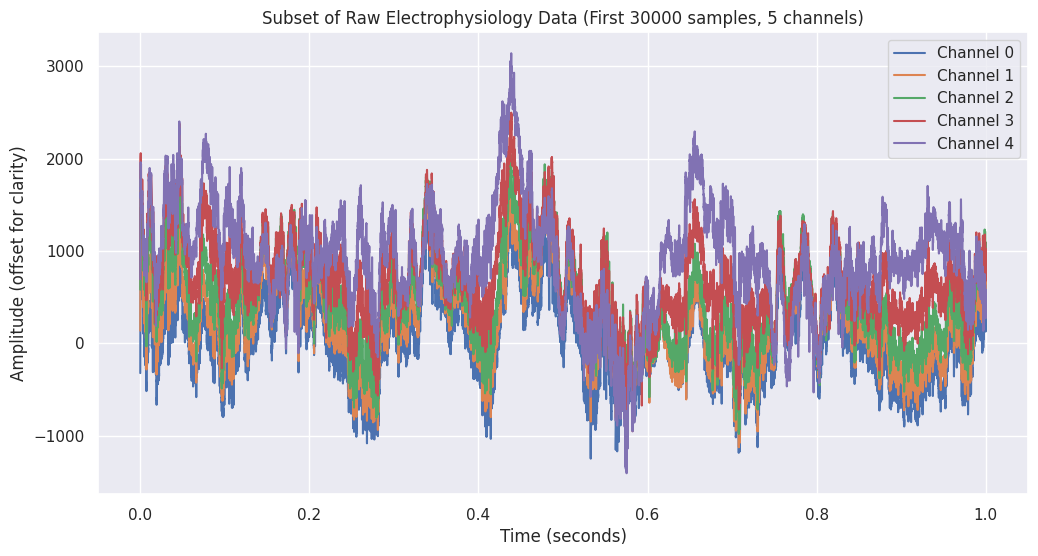

In [5]:
# Access the time series data
time_series_data = nwb.acquisition['time_series'].data

# Get the sampling rate and starting time
sampling_rate = nwb.acquisition['time_series'].rate
starting_time = nwb.acquisition['time_series'].starting_time

# Load a small segment of data (e.g., the first 1 second) for visualization
# Calculate the number of samples for 1 second
num_samples_to_load = int(sampling_rate * 1)

# Load data for the first few channels
num_channels_to_plot = 5
data_subset = time_series_data[0:num_samples_to_load, 0:num_channels_to_plot]

# Create a time vector for the loaded data subset
time_subset = starting_time + np.arange(num_samples_to_load) / sampling_rate

# Plot the data subset
plt.figure(figsize=(12, 6))
for i in range(num_channels_to_plot):
    # Offset the traces for visibility
    plt.plot(time_subset, data_subset[:, i] + i * 200, label=f'Channel {i}')

plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude (offset for clarity)")
plt.title(f"Subset of Raw Electrophysiology Data (First {num_samples_to_load} samples, {num_channels_to_plot} channels)")
plt.legend()
plt.grid(True)
plt.show()

**Note:** The plot above shows a small segment of raw voltage traces from a few channels. This is primarily to demonstrate how to load and visualize the data. Further processing like filtering or spike sorting would be required for analyzing neuronal activity.

## Exploring Unit Data

The `units` table contains information about the single units (neurons) that were detected and sorted. This includes the spike times for each unit.

In [6]:
# Get the units table as a pandas DataFrame
units_df = nwb.units.to_dataframe()

# Display the first few rows of the units table
print("First 5 rows of the units table:")
print(units_df.head())

# Print the columns of the units table
print("\nColumns in the units table:")
print(units_df.columns.tolist())

# Print the total number of units
print(f"\nTotal number of units: {len(units_df)}")

# Get the IDs of the first few units
first_unit_ids = units_df.index.tolist()[:5]
print(f"\nIDs of the first 5 units: {first_unit_ids}")

First 5 rows of the units table:
                                          spike_times
id                                                   
1   [3.5485, 3.5543666666666667, 3.784666666666667...
2   [0.1826, 0.21976666666666667, 0.77823333333333...
3   [0.005533333333333334, 0.01633333333333333, 0....
4   [0.5452333333333333, 0.5632, 0.572833333333333...
5   [0.07036666666666666, 0.1002, 0.17066666666666...

Columns in the units table:
['spike_times']

Total number of units: 33

IDs of the first 5 units: [1, 2, 3, 4, 5]


## Visualizing Unit Spike Times

We can visualize the spike times for a few selected units to see their activity patterns over a period of time.

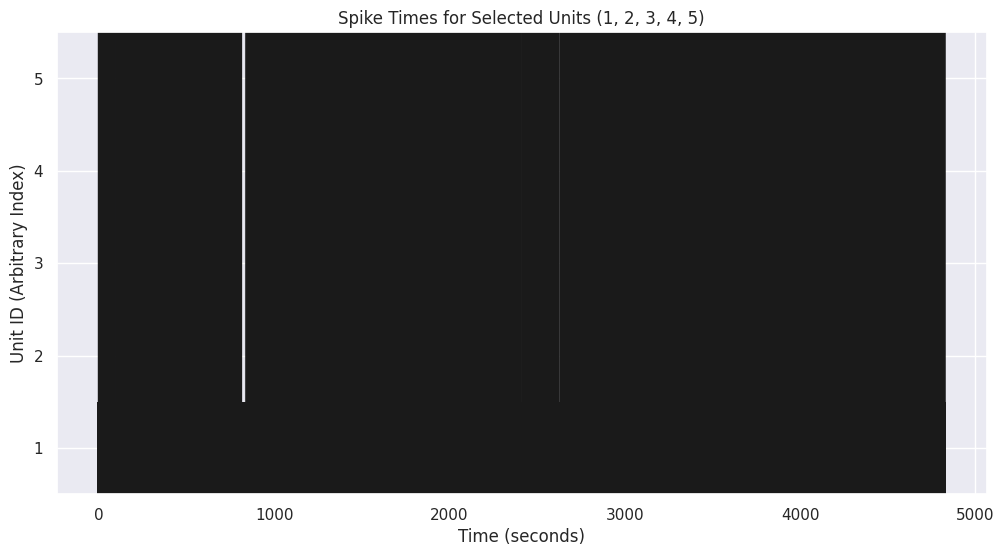

In [7]:
# Select a few unit IDs to visualize
unit_ids_to_plot = units_df.index.tolist()[0:5] # Visualize the first 5 units

plt.figure(figsize=(12, 6))

# Iterate over the selected units and plot their spike times
for i, unit_id in enumerate(unit_ids_to_plot):
    # Get spike times for the current unit
    spike_times = nwb.units['spike_times'][nwb.units.id[:] == unit_id][0]

    # Plot spike times as vertical lines (raster plot like)
    plt.vlines(spike_times, i + 0.5, i + 1.5, color='k', alpha=0.8)

plt.xlabel("Time (seconds)")
plt.ylabel("Unit ID (Arbitrary Index)")
plt.title(f"Spike Times for Selected Units ({', '.join(map(str, unit_ids_to_plot))})")
plt.yticks(np.arange(len(unit_ids_to_plot)) + 1, unit_ids_to_plot)
plt.ylim(0.5, len(unit_ids_to_plot) + 0.5)
plt.grid(True, axis='x')
plt.show()

**Note:** The plot above shows the occurrences of spikes for a few units as vertical lines over time. This provides a basic visualization of neuronal firing patterns.

## Summary and Future Directions

This notebook provided a basic introduction to accessing and exploring data within Dandiset 001375. We demonstrated how to load the Dandiset and an NWB file, examine its structure and metadata, and visualize subsets of raw electrophysiology data and unit spike times.

For further analysis, researchers could:
- Load and examine data from other NWB files in the Dandiset.
- Perform more sophisticated analysis on the electrophysiology data, such as filtering, spike sorting (outside the scope of a simple notebook), and calculating power spectral densities.
- Analyze the relationship between neuronal activity (spike times) and behavioral events (defined in the `intervals/trials` table).
- Investigate the spatial organization of electrodes and units based on the information in the `electrodes` table.
- Explore other data modalities if present in other NWB files within the Dandiset.

In [8]:
# Close the NWB file
io.close()
h5_file.close()